### Reviewer Notes <a class="anchor" id="chapter1"></a>

Hi,<br>
I made for you a markdown cell for your review😊<br>
You are more then welcome to delete the content of this cell and put yours

### Tables Of Contents <a class="anchor" id="table_of_contents"></a>

* [Reviewer Notes](#chapter1)
* [Project's Goal](#chapter2)
* [Libraries Used](#chapter3)
* [Files Used](#chapter4)
* [initial inspection](#chapter5)
* [Step 2](#chapter6)
* [Step 3](#chapter7)
* [Step 4](#chapter8)
* [Final conclusion](#chapter9)


# goal of this project:<a class="anchor" id="chapter2"></a>

The gym chain Model Fitness is developing a customer interaction strategy based on analytical data.
One of the most common problems gyms and other services face is customer churn. How do you know if a customer is no longer with you? You can calculate churn based on people who get rid of their accounts or don't renew their contracts. However, sometimes it's not obvious that a client has left: they may walk out on tiptoes.<br>
Churn indicators vary from field to field. If a user buys from an online store rarely but regularly, you can't say they're a runaway. But if for two weeks they haven't opened a channel that's updated daily, that's a reason to worry: your follower might have gotten bored and left you.<br>
For a gym, it makes sense to say a customer has left if they don't come for a month. Of course, it's possible they're in Cancun and will resume their visits when they return, but's that's not a typical case. Usually, if a customer joins, comes a few times, then disappears, they're unlikely to come back.<br>
In order to fight churn, Model Fitness has digitized a number of its customer profiles. Your task is to analyze them and come up with a customer retention strategy.
You should:
* Learn to predict the probability of churn (for the upcoming month) for each customer
* Draw up typical user portraits: select the most outstanding groups and describe their main features
* Analyze the factors that impact churn most
* Draw basic conclusions and develop recommendations on how to improve customer service:
* Identify target groups
* Suggest measures to cut churn
* Describe any other patterns you see with respect to interaction with customers<br><br>
<b>Data Description</b><br>
gym_churn_us data:
* 'Churn' — the fact of churn for the month in question
* 'gender' - cutomer's gender 0 means female, 1 means male
* 'Near_Location' — whether the user lives or works in the neighborhood where the gym is located
* 'Partner' — whether the user is an employee of a partner company (the gym has partner companies whose employees get discounts; in those cases the gym stores information on customers' employers)
* Promo_friends — whether the user originally signed up through a "bring a friend" offer (they used a friend's promo code when paying for their first membership)
* 'Phone' — whether the user provided their phone number
* 'Age' - customer's age
* 'Lifetime' — the time (in months) since the customer first came to the gym
* 'Contract_period' — 1 month, 3 months, 6 months, or 1 year
* 'Month_to_end_contract' — the months remaining until the contract expires
* 'Group_visits' — whether the user takes part in group sessions
* 'Avg_class_frequency_total' — average frequency of visits per week over the customer's lifetime
* 'Avg_class_frequency_current_month' — average frequency of visits per week over the preceding month
* 'Avg_additional_charges_total' — the total amount of money spent on other gym services: cafe, athletic goods, cosmetics, massages, etc.

* In general 0 is False and 1 is True *

### Used Libraries In This Project<a class="anchor" id="chapter3"></a>

First of all I need to update seaborn for some graph use

In [60]:
!pip install --upgrade seaborn

  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.10.0
    Uninstalling seaborn-0.10.0:
      Successfully uninstalled seaborn-0.10.0


In [67]:
import pandas as pd
import numpy as np
from datetime import datetime 
import matplotlib.pyplot as plt
import seaborn as sb
from plotly import graph_objects as go 
import plotly.express as px
from scipy import stats as st
import math
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans


### Reading the File <a class="anchor" id="chapter4"></a>

In [2]:
#local use
path = 'C:/Users/doron/Downloads/gym_churn_us.csv'

#platform use
path = '/datasets/gym_churn_us.csv'

gym = pd.read_csv(path)


### initial inspection<a class="anchor" id="chapter5"></a>

In [3]:
gym.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [4]:
gym.shape

(4000, 14)

In [5]:
gym.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [6]:
gym.tail()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0
3999,1,0,1,0,0,12,1,30,178.861814,12.0,1,1.101832,1.035270,0


In [7]:
gym.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [8]:
gym.duplicated().value_counts()

False    4000
dtype: int64

### Conclusion

In this file I have 4000 rows with 14 columns.
I have no missing values in the data and no duplicated values and evey feature is in numeric format which is great for ML project<br>

<br>

* [return to table of contents](#table_of_contents)

# Step 2<a class="anchor" id="chapter6"></a>

Now I'll divide the data to 2 data frames (left and stayed) with only features by dropping churn 

In [97]:
left = gym.query('Churn == 1')
left = left.drop('Churn', axis =1)
left

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,cluster_km
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,3
11,1,1,1,0,1,1,0,27,266.783824,1.0,2,2.348535,1.584316,3
13,1,1,0,0,1,1,1,27,152.748668,1.0,1,0.000000,0.000000,3
21,0,0,0,0,1,1,0,30,153.198594,1.0,3,0.636382,0.000000,3
23,1,1,0,0,1,1,1,32,276.079882,1.0,1,1.420637,1.043101,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3982,1,1,0,0,1,1,0,24,135.395712,1.0,0,1.390251,0.789321,3
3984,1,1,0,0,1,6,1,22,101.107544,6.0,2,1.377860,0.343915,3
3986,0,1,1,1,1,1,1,34,226.804845,1.0,0,1.399529,0.304130,3
3994,1,1,0,0,1,1,0,26,31.066721,1.0,1,1.157451,0.269597,3


In [98]:
stayed = gym.query('Churn == 0')
stayed = stayed.drop('Churn', axis =1)
stayed

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,cluster_km
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,2
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,3
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,2
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,0,1,1,0,1,1,0,33,231.778628,1.0,3,1.418791,1.450442,3
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,2
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,2
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,2


Almost 25% of the customers left this is really worth looking into! <br>
in order to do that I'll check the distribution values of the features per group from the original data using the describe method on each column.

In [99]:
for col in gym.columns:
    print(col)
    print(gym.groupby('Churn')[col].describe())

gender
        count      mean       std  min  25%  50%  75%  max
Churn                                                     
0      2939.0  0.510037  0.499984  0.0  0.0  1.0  1.0  1.0
1      1061.0  0.510839  0.500118  0.0  0.0  1.0  1.0  1.0
Near_Location
        count      mean       std  min  25%  50%  75%  max
Churn                                                     
0      2939.0  0.873086  0.332933  0.0  1.0  1.0  1.0  1.0
1      1061.0  0.768143  0.422217  0.0  1.0  1.0  1.0  1.0
Partner
        count      mean       std  min  25%  50%  75%  max
Churn                                                     
0      2939.0  0.534195  0.498914  0.0  0.0  1.0  1.0  1.0
1      1061.0  0.355325  0.478837  0.0  0.0  0.0  1.0  1.0
Promo_friends
        count      mean       std  min  25%  50%  75%  max
Churn                                                     
0      2939.0  0.353522  0.478144  0.0  0.0  0.0  1.0  1.0
1      1061.0  0.183789  0.387495  0.0  0.0  0.0  0.0  1.0
Phone
       

In [100]:
gym.groupby('Churn')['Contract_period'].value_counts()

Churn  Contract_period
0      1                  1273
       12                  937
       6                   729
1      1                   934
       6                   104
       12                   23
Name: Contract_period, dtype: int64

From what I see here I can conclude this:<br>
<b>Stayed Customers</b>
* There are more men then women in this group
* Most customers were close to home/work
* Most customers are employees of a partner company
* Most customers weren't from friends or acquaintances
* The majority of the customers left thier phone number
* Seems like most customers did the 1 month plan but it averages out near the 6 month plan
* Most customers didn't participate in group sessions
* The average age is close to 30
* Seems like 158$ was the average a customer spent on other gym services
* Seems like most customers left with 5 months or more left on their plan
* Most customers weren't in the gym for more then 5 months
* Most customers came to the gym around twice a week in the last year and in the last month

<br><b>Left Customers</b>

* There are more men then women in this group
* Most customers were close to home/work
* Most customers aren't employees of a partner company
* Most customers weren't from friends or acquaintances
* The majority of the customers left thier phone number
* Seems like most customers did the 1 month plan but it averages out near 2 months
* Most customers didn't participate in group sessions
* The average age is close to 27
* Seems like 115$ was the average a customer spent on other gym services
* Seems like most customers left with about 1.5 months or more left on their plan
* Most customers weren't in the gym for more then a month
* Most customers came to the gym around once a week in the last year and once a week in the last month 

From this I can see that some of the customers that left weren't in a partner company which means that some of the people that left didn't have a connection to a partner company, which means that more partners should benefit the gym in the long run.

* [return to table of contents](#table_of_contents)

Now I'll add correlation matrix per group and I'll use heatmap to display it

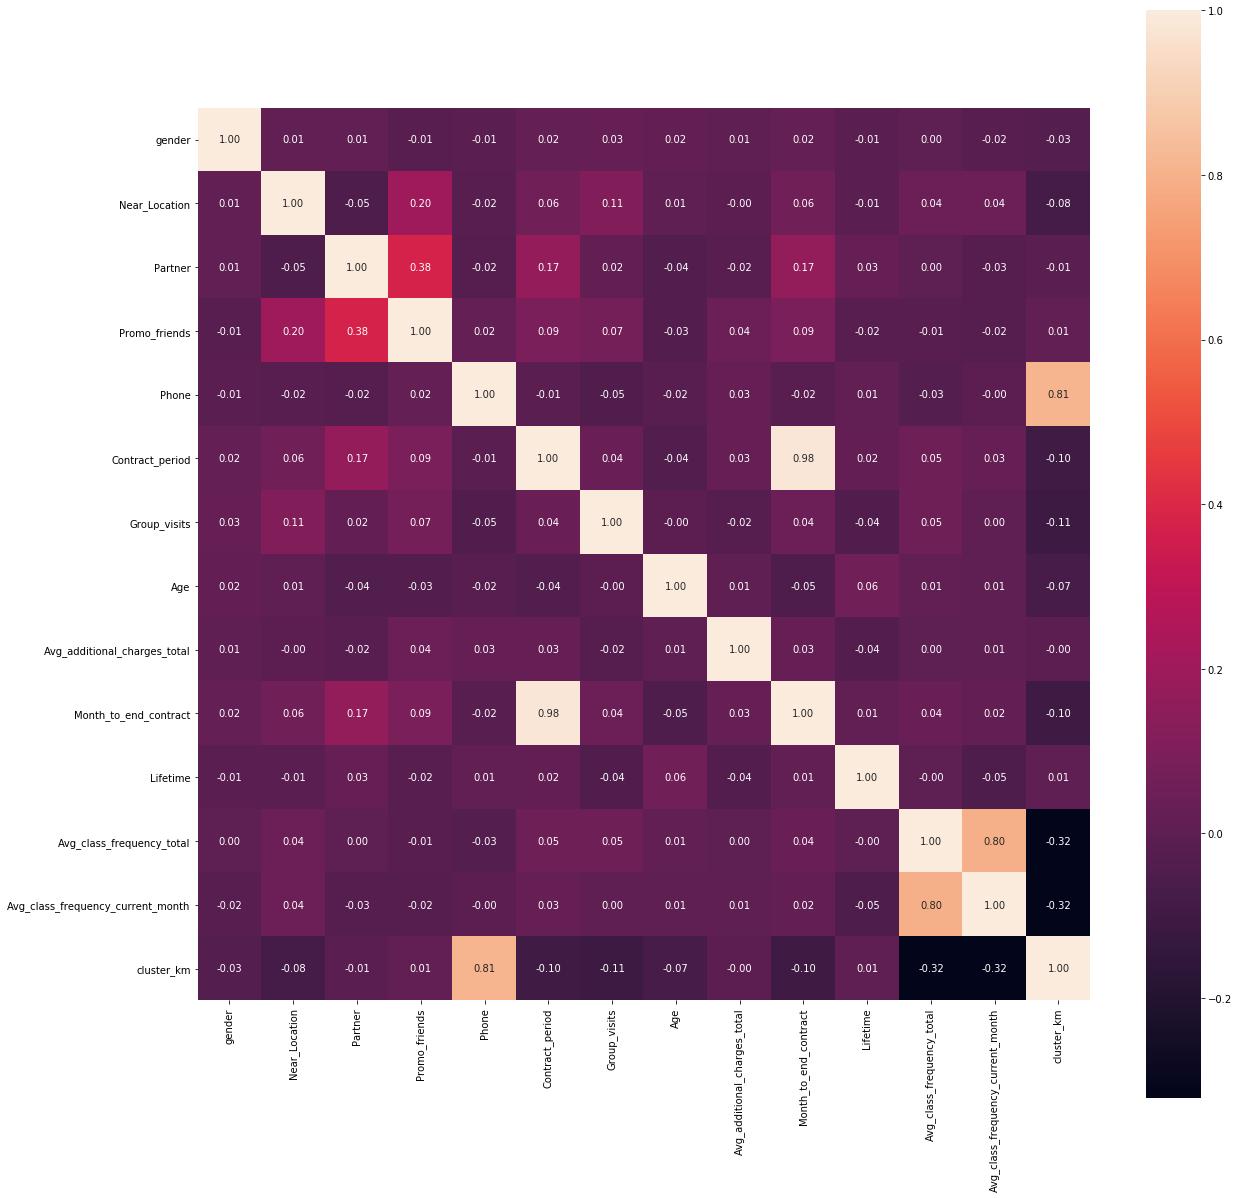

In [101]:
corr_l = left.corr()
plt.figure(figsize=(20, 20))
# plot a heatmap
ax = sb.heatmap(corr_l, annot=True,square = True , fmt=".2f")



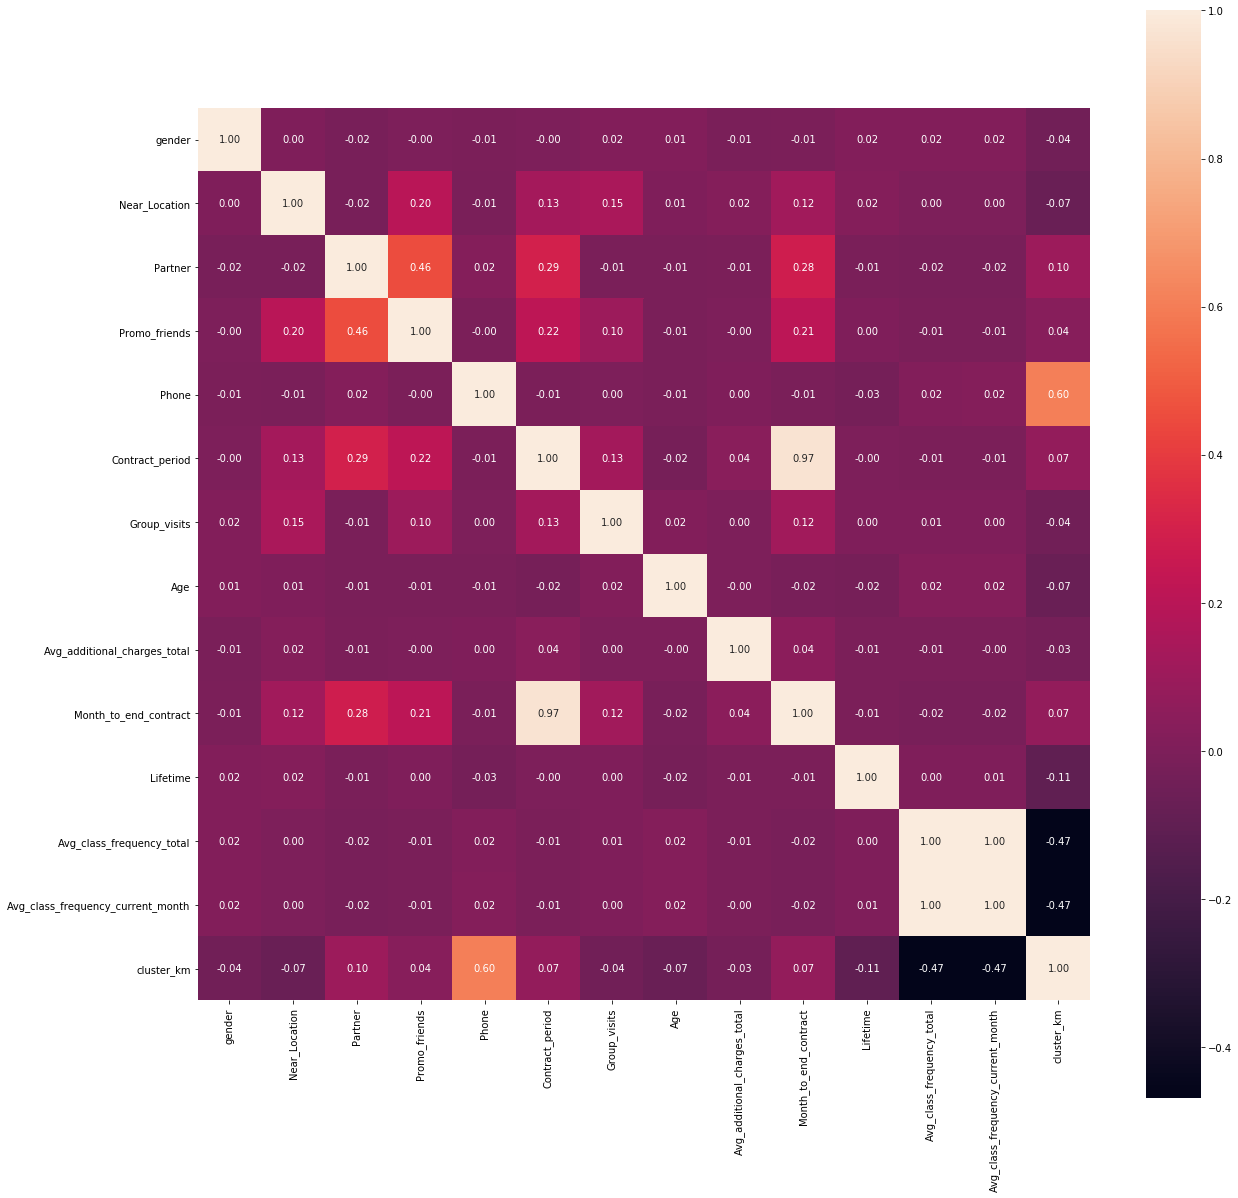

In [102]:
corr_s = stayed.corr()
plt.figure(figsize=(20, 20))
# plot a heatmap
ax = sb.heatmap(corr_s, annot=True,square = True , fmt=".2f")

I can see that in the group that stayed there is high correlation in months left and the plan length as well as in the average visits per week for last month and for the year which is expected given how these features are fairly closed to each other. <br>
In the customers that left group I can see similarities on these features about the same as on the stayed group but it's less stronger on visits per week for last month and for the year

* [return to table of contents](#table_of_contents)

# Step 3<a class="anchor" id="chapter7"></a>

I'll now train the data for Churn on 80-20 ratio

In [34]:
# Dividing the data into features (the X matrix) and a target variable (y)
X = gym.drop('Churn', axis = 1)
y = gym['Churn']
# divide the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

After the model has been trained I'll train the model on the train set with two methods:<br>
* logistic regression
* random forest

I'll start with logistic regression

In [36]:
# Logistic regression 

# Creating an instance of the model
logicr_model = LogisticRegression(random_state=0)

# training the model on the training data set and storing the information learned from the data
logicr_model.fit(X_train, y_train)

# using the trained model to make forecasts
logicr_predictions = logicr_model.predict(X_test) 
logicr_probabilities = logicr_model.predict_proba(X_test)[:,1]

C:\Users\doron\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Now I'll train the random forest model

In [35]:
# Random forest

# defining the algorithm for the new random forest model
rforest_model = RandomForestClassifier(random_state=0) 

# training the random forest model
rforest_model.fit(X_train, y_train)

# using the trained model to make predictions
rforest_predictions = rforest_model.predict(X_test)
rforest_probabilities = rforest_model.predict_proba(X_test)[:,1]

I'll now write a function to show accuracy, precision, and recall for any model

In [37]:
def print_all_metrics(y_true, y_pred, y_proba, title = 'Classification metrics'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))

Now I'll print the metrics of both models

In [39]:
print_all_metrics(y_test, logicr_predictions, logicr_probabilities , title='Metrics for logistic regression:')

Metrics for logistic regression:
	Accuracy: 0.91
	Precision: 0.82
	Recall: 0.80


In [41]:
print_all_metrics(y_test,rforest_predictions,rforest_probabilities, title = 'Metrics for random forest:')

Metrics for random forest:
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.82


It seems like random forest model is better at all metrics here and is much accurate for this case

* [return to table of contents](#table_of_contents)

# Step 4<a class="anchor" id="chapter8"></a>

I'll now standardize the data and I will also build a matrix of distances based on the standardized feature matrix using the linkage function

In [47]:
scaler = StandardScaler() # creating a scaler class object (normalizer)
x_sc = scaler.fit_transform(X) # training the normalizer and transforming the dataset 
linked = linkage(x_sc, method = 'ward') 

Now I'll plot a dendogram that represents the distance between clusters which will help me determine what is the number of clusters that is needed

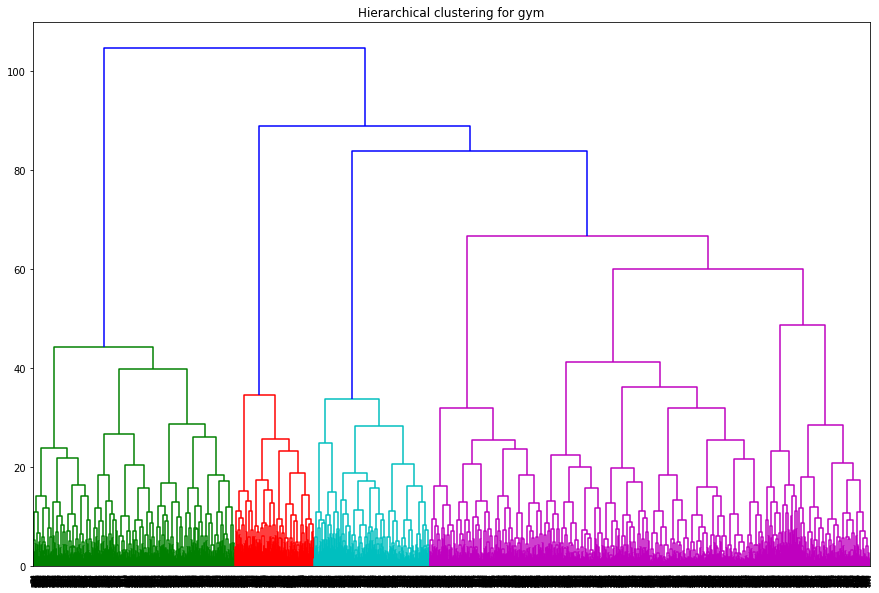

In [49]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchical clustering for gym')
plt.show() 

From what I can see here we have 4 different clusters (based on different colors close to the X axis). Since I have been asked in the project description to use 5 clusters I'll write variable for both options I'll check for 4 but if needed uncomment the 2nd row of the next cell

In [107]:
n = 4
#n = 5
km = KMeans(n_clusters = n , random_state = 0) # setting the number of clusters as 5
labels = km.fit_predict(x_sc) # applying the algorithm to the data and forming a cluster vector 

I'll now add the labels that were created to the original data and I'll show average of everey feature per cluster (0-3)

In [108]:
gym['cluster_km'] = labels
gym.groupby(['cluster_km']).mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster_km,,,,,,,,,,,,,,
0,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,1.723967,0.266839
1,0.541588,0.865784,0.335539,0.199433,1.0,2.386578,0.450851,30.005671,157.889886,2.224008,4.706994,2.714015,2.700512,0.092628
2,0.503697,0.940850,0.778189,0.573937,1.0,10.685767,0.533272,29.896488,161.102734,9.756932,4.720887,1.991351,1.983043,0.029575
3,0.489145,0.755767,0.385346,0.192673,1.0,1.895522,0.291723,28.042062,129.409699,1.802578,2.232022,1.203721,0.949771,0.561737


## <b><font color='blue'>Notice:</font></b>
## Clusters might appear in different order on the platform

looks like cluster 3 customers are the most prone to leave it seems like: 
* the customers were around for only 2 months 
* these customers spend the least money on extra services
* They are the youngest of the bunch
* They had the least group visits
* They were in the least amount of classes
* Most of them had short term subscriptions
* Even though the gym was close to their home/work they have the longest distance from the gym compared to other clusters
* Most of the customers in this cluster are female

<br>Cluster 2 are the most loyal (cluster 1 isn't that far behind)
* The customers were around the longest around months 
* They got the longest subscription
* Spent the most on extra services
* They come in groups often compared to other clusters
* Alot of them came from friends or acquaintances
* The majority are from partnerd companies
* Most of the customers in this cluster work or live near the gym



<br>I'll now plot distributions of features for the clusters

In [96]:
fig = go.Figure(data=go.Splom(
                  dimensions=[dict(label='gender', values=gym['gender']),
                              dict(label='Near_Location', values=gym['Near_Location']),
                              dict(label='Partner', values=gym['Partner']),
                              dict(label='Promo_friends', values=gym['Promo_friends']),
                              dict(label='Phone', values=gym['Phone']),
                              dict(label='Contract_period', values=gym['Contract_period']),
                              dict(label='Group_visits', values=gym['Group_visits']),
                              dict(label='Age', values=gym['Age']),
                              dict(label='Avg_additional_charges_total', values=gym['Avg_additional_charges_total']),
                              dict(label='Month_to_end_contract', values=gym['Month_to_end_contract']),  
                              dict(label='Lifetime', values=gym['Lifetime']),  
                              dict(label='Avg_class_frequency_total', values=gym['Avg_class_frequency_total']),  
                              dict(label='Avg_class_frequency_current_month', values=gym['Avg_class_frequency_current_month'])],                                
                              marker=dict(color=gym['cluster_km'],
                              size=5,
                              colorscale='Bluered',
                              line=dict(width=0.5,
                                        color='rgb(230,230,230)')),
                  text = gym['cluster_km'],  
                  diagonal=dict(visible=False)))

title = "Feature distribute per cluster"
fig.update_layout(title=title,
                  dragmode='select',
                  width=3500,
                  height=3500,
                  hovermode='closest')

fig.show()

I don't see here much new info aside from the fact that the higher correleated features are the top ones from cluster 2 which I elaborated about before in the cell above the plot

* [return to table of contents](#table_of_contents)

# <font color='scarlet'>Final conclusion</font><a class="anchor" id="chapter9"></a>

After everything that I found here are my thoughts and suggestions:<br><br>
<br>1. Since most of the loyal customers comes from the bring a friend promotion I would advise to give extra rewards for x amount of new friends that a someone brings or even make a 2-3 months long contest on the most active friends that a customer brings. Active friends in this regards can be measured by amount of visits in the gym for that peroid of time (the more someone comes the more they are likely to stay).<br>

<br>2. Most of the loyal customers are from partnerd companies and live or work nearby in that sense it should be worthwhile to get more partners that have offices/branches near the gym.<br>

<br>3. Beacuse of the previous suggestions and from what I learned from the loyal customers of cluster 2 group activities can be a great hit after all most customers have at least one friend , acquaintance or a co-worker in the gym setting group seesions in the gym where they can also hang out can create a more positive vibe which will help with the loyalty of the customers.<br>

<br>4. Most customers from the worst cluster are female which are a huge market cut my suggestion here will be to maybe create a yoga/aerobic class for females only once-twice a week to make them feel more comftorble and get them more engaged in gym activities.<br>

<br>5. My final suggestion at this point will be to give new potential members a good deal on the longer subscriptions since from the data it's clear that the customers with the longer subscriptions are also the most loyal <br>


* [return to table of contents](#table_of_contents)